# Checking stability of the model versus time

<b>Problem</b><br>
One of the problems of the current framework is the fact that hard coded tests are not able to handle cases when the number of acquired statistics are limited i.e. at the low lumisection range, especially at the begining of the run. This produces too many false positives at the beginig of the run, however they stabilize over time. 

<b>Goal</b><br>
The goal of this exercise is to evaluate if the new models handle low-statistics better.

<b>Assumption</b><br>
The assumption is that the alarms are to be generated starting from none to a certain value that holds throught the run. We don't know if the predictions are correct but the aim of this exercise is to guarantee stability, not accuracy (use the other notebook for this). We also plot emerging problems as we want to ensure that the scoring fluctations are not suspicious.

<b>Method</b><br>
We are going to plot number of alarms for four collision runs and check the number of alarms generated throughtout the time (lumisections). We have a datapoint every 10 lumisections.

In [1]:
data_directory = "../data"

In [2]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

matplotlib.rcParams["figure.figsize"] = (15.0, 8.0)
matplotlib.rcParams["xtick.labelsize"] = 16
matplotlib.rcParams["ytick.labelsize"] = 16
matplotlib.rcParams["axes.spines.left"] = False
matplotlib.rcParams["axes.spines.bottom"] = False
matplotlib.rcParams["axes.spines.right"] = False
matplotlib.rcParams["axes.spines.top"] = False
matplotlib.rcParams["axes.titlesize"] = 16
matplotlib.rcParams["figure.titlesize"] = 16
matplotlib.rcParams["axes.labelsize"] = 14
matplotlib.rcParams["legend.fontsize"] = 14


color_palette = ["#F44336", "#9C27B0", "#3F51B5", "#03A9F4", "#009688",
                 "#8BC34A", "#FFC107", "#FF5722", "#9E9E9E"]

In [3]:
total_no_layers = 2721
total_no_chambers = 250

### Let's check the stability:

In [4]:
# Had to be generated before loading in the notebook because ROOT/Notebook import issues
import pandas as pd

runs = [306777, 306801, 306793, 306794]

drift_tubes_alarms = pd.DataFrame()

for run in runs:
    path = "%s/%sST.csv" % (data_directory, run)
    drift_tubes_alarms = drift_tubes_alarms.append(pd.read_csv(path),
                                                   ignore_index=True);

For <i>lumi = 0</i> the model returns negative result, while current dqm a positive. Let's add this information since we don't have it in dataframe now.

In [5]:
for run in runs:
    df_zero = pd.DataFrame({'lumi': [0],
                            'current_dqm': [total_no_chambers],
                            'total': [0],
                            'emerging': [0],
                            'run': run})
    drift_tubes_alarms = pd.concat([df_zero, drift_tubes_alarms],
                                   ignore_index=True)

Change absolute number to fraction of faults reported wrt. all data points. This helps comparing current vs. proposed

In [6]:
drift_tubes_alarms["total"] = drift_tubes_alarms["total"]/total_no_layers
drift_tubes_alarms["emerging"] = drift_tubes_alarms["emerging"]/total_no_layers
drift_tubes_alarms["current_dqm"] = drift_tubes_alarms["current_dqm"]/total_no_chambers

Plot the stability of the results

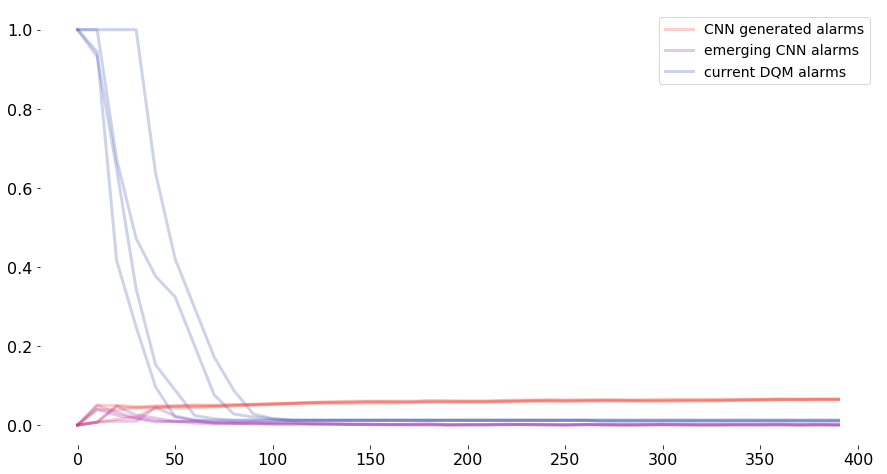

In [7]:
fig, ax = plt.subplots()

for i, run in enumerate(runs):
    df = drift_tubes_alarms[drift_tubes_alarms.run == run].sort_values("lumi", ascending=1)
    plt.plot(df["lumi"],
             df["total"],
             color=color_palette[0],
             linewidth=3.0,
             alpha=0.25,
             label="CNN generated alarms" if i == 0 else "")
    plt.plot(df["lumi"],
             df["emerging"],
             color=color_palette[1],
             linewidth=3.0,
             alpha=0.25,
             label="emerging CNN alarms" if i == 0 else "")
    plt.plot(df["lumi"],
             df["current_dqm"],
             color=color_palette[2],
             linewidth=3.0,
             alpha=0.25,
             label="current DQM alarms" if i == 0 else "")
    
plt.legend(loc="best")
plt.show()

And zoomed in

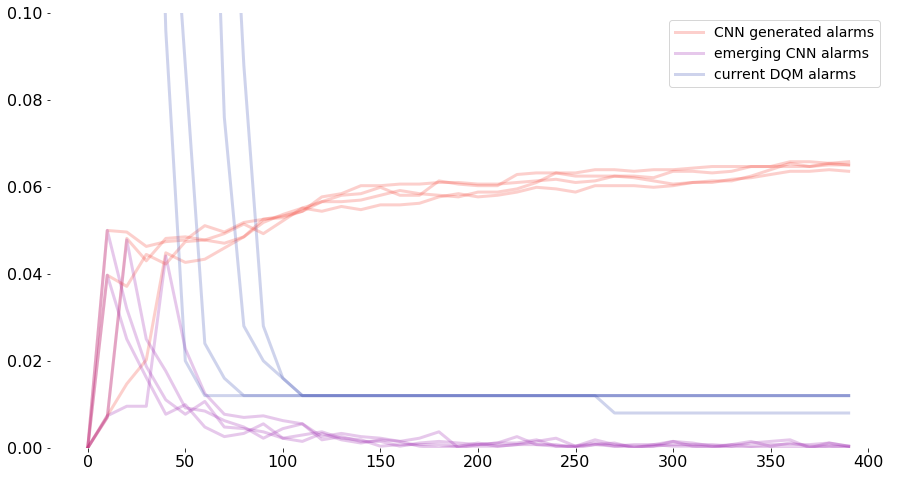

In [10]:
fig, ax = plt.subplots()

for i, run in enumerate(runs):
    df = drift_tubes_alarms[drift_tubes_alarms.run == run].sort_values("lumi", ascending=1)
    plt.plot(df["lumi"],
             df["total"],
             color=color_palette[0],
             linewidth=3.0,
             alpha=0.25,
             label="CNN generated alarms" if i == 0 else "")
    plt.plot(df["lumi"],
             df["emerging"],
             color=color_palette[1],
             linewidth=3.0,
             alpha=0.25,
             label="emerging CNN alarms" if i == 0 else "")
    plt.plot(df["lumi"],
             df["current_dqm"],
             color=color_palette[2],
             linewidth=3.0,
             alpha=0.25,
             label="current DQM alarms" if i == 0 else "")
    
plt.legend(loc="best")
plt.ylim([0, 0.1])
plt.show()

<b>Comment</b><br>
The graph shows that CNN produces stable results with not many emerging alarms.

<b>Recommedations</b><br>
To reduce the amount of emerging alarms after <i>lumi = 10</i> and to ensure faster stabilization one would have to label more samples integrated over low statistics.